In [32]:
import numpy as np
import pandas as pd
# Seaborn is a Python data visualization library based on matplotlib. 
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# load titanic dataset
titanic = sns.load_dataset('titanic')

<span style="color:royalblue; font-size: 20px;">Data Cleaning</span>

In [34]:
# returns descriptive statistics
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
# find the number of rows and columns 
num_rows, num_columns = titanic.shape

("Number of rows", {num_rows}, "Number of columns", {num_columns})

('Number of rows', {891}, 'Number of columns', {15})

In [36]:
# data type of all columns in the dataframe
data_types = titanic.dtypes
data_types


survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [37]:
# calculate the missing values in each column of the datase
# isnill - creates a dataframe where cells contain true (missing) or false
# sums the true values
missing_values = titanic.isnull().sum()
print("Missing Values:")
missing_values

Missing Values:


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [38]:
# checks if there is atleast one true (missing) value along each column
any_values = titanic.isnull().any()
print("Any Values:")
any_values


Any Values:


survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [39]:
# count duplicate rows
duplicates_count = titanic.duplicated().sum()
print("\nDuplicate Rows:")
duplicates_count


Duplicate Rows:


107

<Axes: >

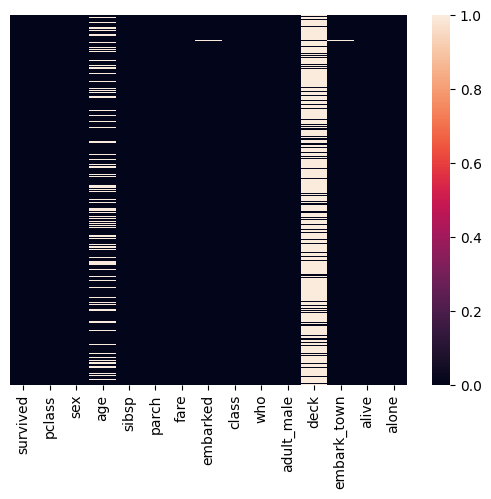

In [40]:
initial_hm = sns.heatmap(titanic.isnull(), yticklabels=False)
initial_hm

In [41]:
# impute / fill missing values for embarked with mode (most frequent)
# as there are a few missing values using fillna()
impute_embarked = titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
impute_embark_town = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)
impute_embarked
impute_embark_town

In [42]:
missing_values_1 = titanic.isnull().sum()
print("Missing Values:")
missing_values_1

Missing Values:


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

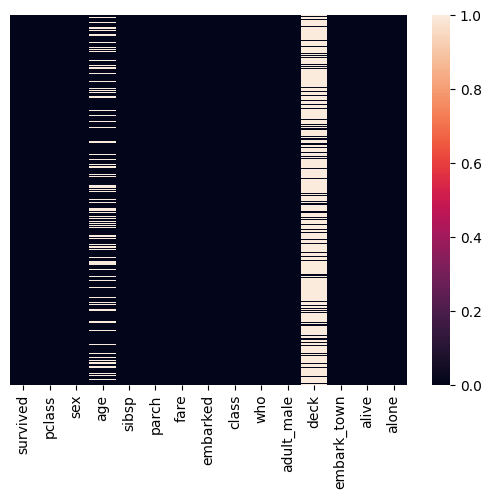

In [43]:
hm_1 = sns.heatmap(titanic.isnull(), yticklabels=False)

In [44]:
# calculate total rows
total_rows = len(titanic)

# get missing age count
missing_age_values = titanic["age"].isnull().sum()

# find percentage missing for age column
percentage_missing_age = (missing_age_values / total_rows) * 100

f"Percentage missing of values in the age column: {percentage_missing_age:.2f}%"


'Percentage missing of values in the age column: 19.87%'

In [45]:
# use caetrgories of passengers as 'man', 'woman', or 'child'
# find mean for each individual group
mean_age_by_group = titanic.groupby('who')['age'].mean()

# fill missing values for age based on the mean age of each group
# ensures more accuracy
titanic['age'] = titanic.apply(
    lambda row: mean_age_by_group[row['who']] 
    if pd.isna(row['age']) 
    else row['age'],
    axis=1
)

In [46]:
# calculate total rows
total_rows = len(titanic)

# get missing deck count
missing_deck_values = titanic["deck"].isnull().sum()

# find percentage missing
percentage_missing_deck = (missing_deck_values / total_rows) * 100


f"Percentage missing of values in the deck column: {percentage_missing_deck:.2f}%"

'Percentage missing of values in the deck column: 77.22%'

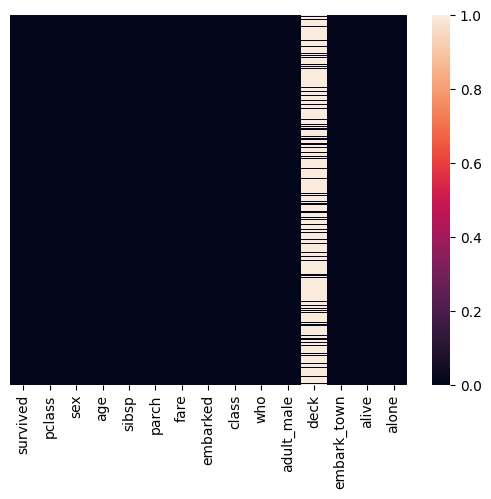

In [47]:
hm_2 = sns.heatmap(titanic.isnull(), yticklabels=False)

In [48]:
# deck has significant number of missing values and cannot be easily imputed
# drop the deck column
drop_deck_column = titanic.drop(columns=['deck'], inplace=True)
drop_deck_column

In [49]:
missing_values_after_cleaning = titanic.isnull().sum()
print("Missing Values:")
missing_values_after_cleaning

Missing Values:


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

<Axes: >

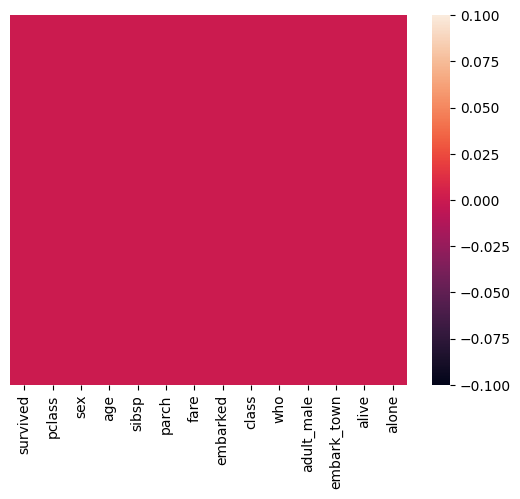

In [50]:
# final heatmap
final_hm = sns.heatmap(titanic.isnull(), yticklabels=False)
final_hm

In [51]:
# returns descriptive statistics
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,30.319458,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.063839,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
# checks if there is atleast one true (missing) value along each column
any_values_after_cleaning = titanic.isnull().any()
print("Any Values:")
any_values_after_cleaning

Any Values:


survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
embark_town    False
alive          False
alone          False
dtype: bool

<span style="color:royalblue; font-size: 20px;">Finding Average Fare and Age for each class</span>

In [53]:
# Group by class and calculate the mean
average_fare_and_age = titanic.groupby('class')[['fare', 'age']].mean()

# Display the result
average_fare_and_age


,fare,age
class,,
First,84.154687,37.481739
Second,20.662183,30.061892
Third,13.675550,27.265160


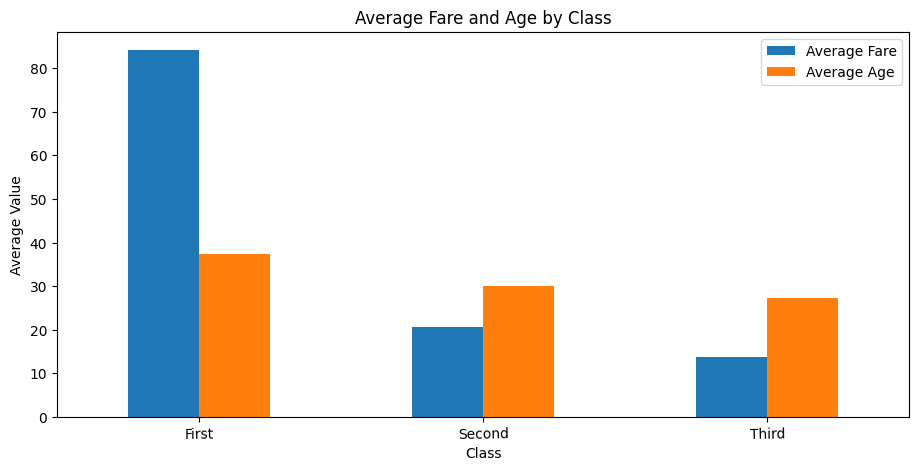

In [54]:
average_fare_and_age.plot(kind='bar', figsize=(11, 5))
plt.title('Average Fare and Age by Class')
plt.xlabel('Class')
plt.ylabel('Average Value')
plt.xticks(rotation=1)
plt.legend(["Average Fare", "Average Age"])
plt.show()

<span style="color:royalblue; font-size: 20px;">New column showing the fare as a percentage of total</span>

In [55]:
# group the data by class and calculate the sum of fare for each class
# reset the index to convert series to dataframe so class so class is a column
sum_of_fare_for_each_class = titanic.groupby('class')['fare'].sum().reset_index()

# rename the fare column to fare_totat
# as there is a conflict with two columns the same name
# can use suffixes parameter
sum_of_fare_for_each_class = sum_of_fare_for_each_class.rename(columns={'fare': 'fare_total'})

# merge the average dataframe with sum dataframe to calculate the percentage
average_fare_and_age = average_fare_and_age.merge(sum_of_fare_for_each_class, on='class')

# calculate the percentage and add it as a new column
# divide fare column in averge by fare total in merged and multiply by 100
new_column = (average_fare_and_age['fare'] / average_fare_and_age['fare_total']) * 100
average_fare_and_age['fare_percentage'] = new_column

average_fare_and_age

,class,fare,age,fare_total,fare_percentage
0,First,84.154687,37.481739,18177.4125,0.462963
1,Second,20.662183,30.061892,3801.8417,0.543478
2,Third,13.675550,27.265160,6714.6951,0.203666


<span style="color:royalblue; font-size: 20px;">Number of female survivors compared to male</span>

In [56]:
# creates a dataframes for rows that are female and survived is true
f_survivors = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 1)]
m_survivors = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)]

# count rows usig len for each
num_female_survivors = len(f_survivors)
num_male_survivors = len(m_survivors)

("F Survivors", num_female_survivors, "M Survivors", num_male_survivors)

('F Survivors', 233, 'M Survivors', 109)

<span style="color:royalblue; font-size: 20px;">Interesting Insights</span>

In [57]:
# survival rate (mean) by embark town
survival_by_embark_town = titanic.groupby('embark_town')['survived'].mean().reset_index()

survival_by_embark_town

,embark_town,survived
0,Cherbourg,0.553571
1,Queenstown,0.389610
2,Southampton,0.339009


In [58]:
# survival rate (mean) by gender
survival_by_gender = titanic.groupby('sex')['survived'].mean().reset_index()

survival_by_gender

,sex,survived
0,female,0.742038
1,male,0.188908


In [59]:
# solo male passengers concat 
essential_columns = ['survived', 'pclass', 'sex', 'age', 'fare']

# concatenate for male and alone
solo_male_data = pd.concat([titanic[(titanic['who'] == 'man') & (titanic['alone'] == True)]])[essential_columns]

# display first few rows
solo_male_data.head()


,survived,pclass,sex,age,fare
4,0,3,male,35.000000,8.0500
5,0,3,male,33.173123,8.4583
6,0,1,male,54.000000,51.8625
12,0,3,male,20.000000,8.0500
17,1,2,male,33.173123,13.0000


In [60]:
# Calculate average age by class
average_age_by_class = titanic.groupby('class')['age'].mean().reset_index()
average_age_by_class = average_age_by_class.rename(columns={'age': 'average_age'})

# calaculate survival by class
survival_by_class = titanic.groupby('class')['survived'].mean().reset_index()
survival_by_class = survival_by_class.rename(columns={'survived': 'survival_rate'})

# concat both dataframes
concat_example = pd.concat([average_age_by_class, survival_by_class['survival_rate']], axis=1)
print(concat_example)


    class  average_age  survival_rate
0   First    37.481739       0.629630
1  Second    30.061892       0.472826
2   Third    27.265160       0.242363


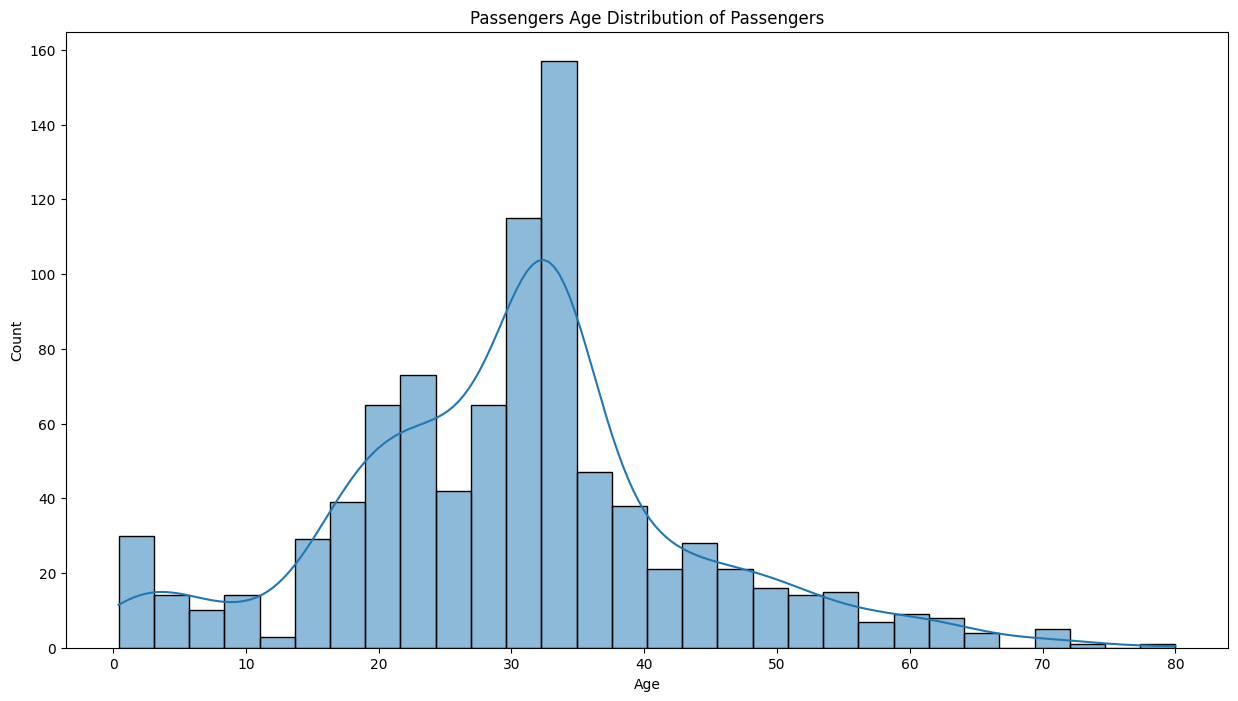

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,549.0,31.169758,12.493024,1.00,23.0,32.0,35.0,74.0
1,342.0,28.954503,13.841086,0.42,21.0,31.0,35.0,80.0


In [61]:
# age distribution of passengers
plt.figure(figsize=(15, 8))
sns.histplot(data=titanic, x='age', kde=True)
plt.title('Passengers Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# calculate age dist by grouping by survived column
# select age and get desrcibtive statistics
# 0 did not survive, 1 survived
age_dist = titanic.groupby('survived')['age'].describe()
age_dist

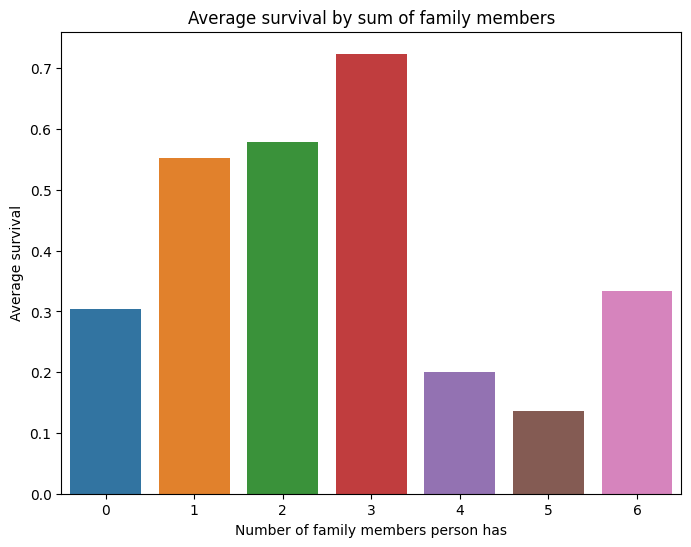

In [62]:
# create a new column for sum of family members
# add the number of siblings, spouses, parents, and children to calculate the total family size
titanic['sum_of_family_members'] = titanic['sibsp'] + titanic['parch']

# calculate average survival rates by family size
average_by_family_members = titanic.groupby('sum_of_family_members')['survived'].mean().reset_index()

# remove rows for 7 and 10
average_by_family_members = average_by_family_members[(average_by_family_members['sum_of_family_members'] != 7) & (average_by_family_members['sum_of_family_members'] != 10)]

# create and display the chart
plt.figure(figsize=(8, 6))
sns.barplot(x='sum_of_family_members', y='survived', data=average_by_family_members)
plt.title('Average survival by sum of family members')
plt.xlabel('Number of family members person has')
plt.ylabel('Average survival')
plt.show()
